> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [The Movie Database (TMDb)]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
>* There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
>* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.



### Question(s) for Analysis
> 1. Which genre of movie has the highest budget and revenue?
> 2. Which genre of movie has the highest runtime?

In [266]:
# importing packages numpy, pandas, matplotlib.pyplot and seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
This is where I import the data and make some observations to determine which data columns are in good shape for the analysis I intend to do. 

In [267]:
# load data and inspect 
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [268]:
# get some information about the datatypes of each column, number of columns and rows, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [269]:
# describe the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [270]:
# identify the number of null rows in dataset
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [271]:
# identify the number of zeros in the dataset
(df == 0).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [306]:
# identify duplicated rows in the dataset
df.duplicated().sum()

1


### Data Cleaning
> It is clear that if some data colums should be dropped so I will drop the following columns:
>* homepage
>* tagline
>* keywords
>* production_companies
>* budget_adj
>* revenue_adj

>I will fill the zeros in budget, revenue and runtime with their respective means

In [316]:
# drop columns with huge number of null cells and equate the remaining to df_1
df_1 = df.drop(['homepage', 'tagline', 'keywords', 'production_companies', 'budget_adj', 'revenue_adj'], axis=1)

# drop duplicated rows and verify
df_1 = df_1.drop_duplicates()
df_1.duplicated().any()

False

In [317]:
# find the mean of budget, revenue and runtime
budget_mean = df_1.budget.mean(axis=0)
revenue_mean = df_1.revenue.mean(axis=0)
runtime_mean = df_1.runtime.mean(axis=0)

In [318]:
# replace zeros in budget, revenue and runtime with their respective means
df_1.budget.replace(0, budget_mean, inplace=True)
df_1.revenue.replace(0, revenue_mean, inplace=True)
df_1.runtime.replace(0, runtime_mean, inplace=True)

# verify if the dataset still has zeros in there
(df_1==0).sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [319]:
# identify the number of rows and columns left
df_1.shape

(10865, 15)

In [320]:
#split genres column and explode
df_1.genres = df_1.genres.str.split('|')

# explode df_1.genres and equate it to movie_data 
movie_data = df_1.explode('genres', ignore_index=True)
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action,6/9/15,5562,6.5,2015
1,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Adventure,6/9/15,5562,6.5,2015
2,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Science Fiction,6/9/15,5562,6.5,2015
3,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Thriller,6/9/15,5562,6.5,2015
4,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.0,Action,5/13/15,6185,7.1,2015


> The data is having a significant amount of rows that can speak for the entire database.
> So I can proceed with the exploration of the dataset.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which genre had the highest budget and revenue?)

In [341]:
# define a function to plot different metrics
def getbars(metric):
    plt.figure(figsize=(10, 5))
    if metric.lower() == 'runtime':
        movie_data.groupby('genres')[metric].mean().sort_values(ascending = False).plot.bar()
    else:
        movie_data.groupby('genres')[metric].sum().sort_values(ascending = False).plot.bar()
        
    plt.xlabel('genres')
    plt.ylabel(f'{metric} value')
    plt.title(f'Genres by {metric}')

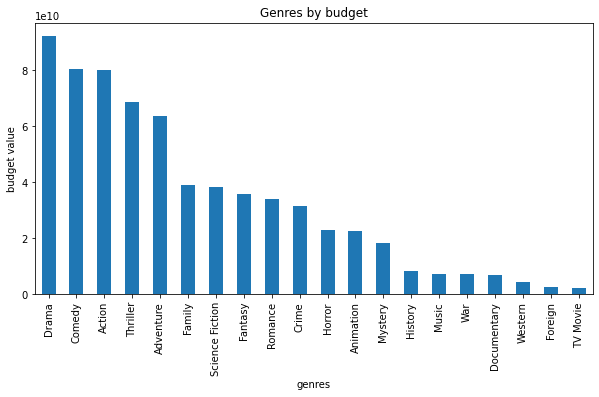

In [342]:
# highest budget
getbars('budget')

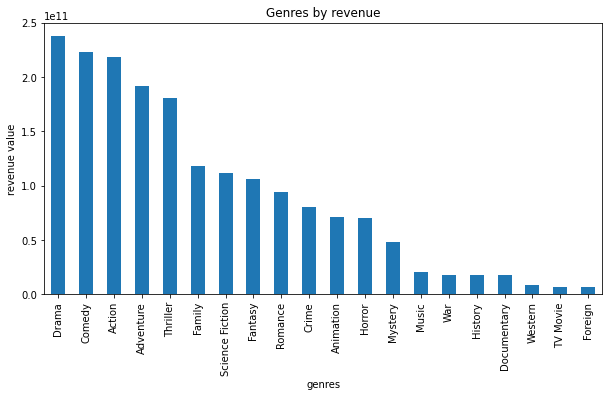

In [343]:
# which genre had the highest revenue?
getbars('revenue')

> From the two plots we can conclude that Drama had the highest budget as well as revenue, followed by Comedy and Action.  
> From the two plots it is clear that budget and revenue have a form of relationship. I will find out what type of relationship exist between them?

In [351]:
# define a function to find the relationship between two variables
def relationship_btw(var1, var2):
    plt.scatter(x=movie_data[var1], y=movie_data[var2])
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'{var1} against {var2}')

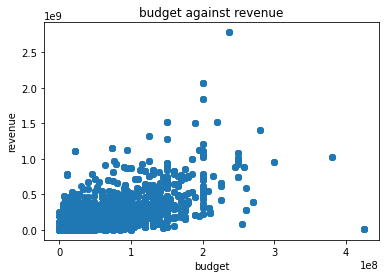

In [352]:
# relationship between budget and revenue
relationship_btw('budget','revenue')

> There exist a positve correlation between budget and revenue.

### Research Question 2  (Which genre of movie has the highest runtime?)

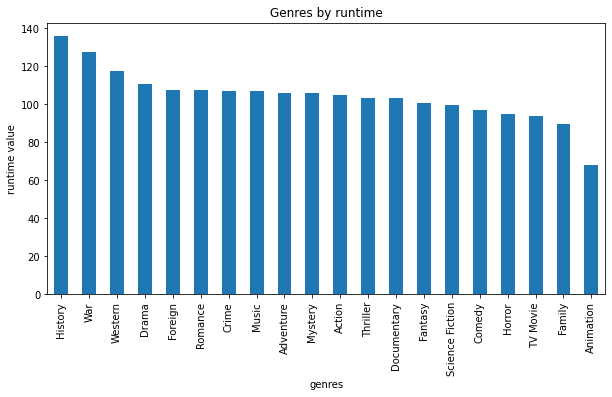

In [354]:
# genre with the highest runtime
getbars('runtime')

> History has the highest runtime followed by War genre

<a id='conclusions'></a>
## Conclusions

> At the end of my analysis, I came to a conclusion that:
> 1. Drama genre had the highest budget and revenue, followed by Comedy and Action genre.
> 2. History genre had the highest runtime followed by War genre.
> 3. There is a positive correlation between budget and revenue, thus, movies with high budget mostly end up raking in high revenue and vice versa.

## Limitations

> Although we successfully obtained the above information on TMDb movie dataset, there are some infomation removed such as rows contained null values.
> Rows containing zeros were filled with the mean of the respected columns and I believe this will have some effect on the actual results.



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [356]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1